# Intersections

In [1]:
import geopandas
import starepandas
import matplotlib.pyplot as plt

In [2]:
fname = 'zip://../tests/data/amapoly_ivb.zip'
amazon = geopandas.read_file(fname) # Nice flex
amazon = amazon.to_crs('EPSG:4326')
amazon['geom_simple'] = amazon.simplify(0.02)
amazon.set_geometry('geom_simple', inplace=True)

amazon = starepandas.STAREDataFrame(amazon)
sids = amazon.make_sids(level=5, force_ccw=True)
amazon.set_sids(sids, inplace=True)

trixels = amazon.make_trixels()
amazon.set_trixels(trixels, inplace=True)

In [3]:
countries = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
countries = countries.sort_values(by='name')
samerica = countries[countries.continent=='South America']

samerica = starepandas.STAREDataFrame(samerica)
sids = samerica.make_sids(level=5)
samerica.set_sids(sids, inplace=True)

trixels = samerica.make_trixels()
samerica.set_trixels(trixels, inplace=True)

In [4]:
stare_amazon = samerica.stare_intersection(amazon.iloc[0].sids)
samerica['stare_amazon'] = stare_amazon
samerica['trixel_amazon'] = samerica.set_sids('stare_amazon').make_trixels()

<AxesSubplot:>

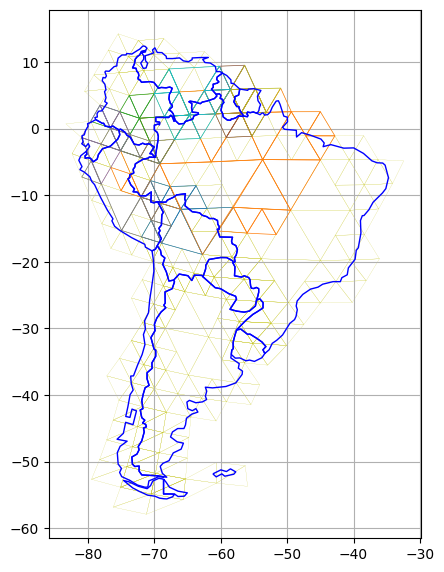

In [5]:
fig, ax = plt.subplots(figsize=(7,7), dpi=100)
ax.grid(True)

samerica.plot(ax=ax, trixels=True, color='y', lw=0.1, zorder=0)
samerica.plot(ax=ax, trixels=False, facecolor='none', edgecolor='blue', lw=1, zorder=4)
df = samerica.set_geometry('trixel_amazon')
df = df[df.geometry.is_empty==False]
df = df.set_geometry(df.geometry.boundary)
df.plot(trixels=False, ax=ax, zorder=3, column='name', lw=0.5)

#plt.savefig('intersection.png')

In [6]:
df

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,sids,trixels,stare_amazon,trixel_amazon
30,11138234,South America,Bolivia,BOL,78350.0,"POLYGON ((-69.52968 -10.95173, -68.78616 -11.0...","[2684145377912815620, 2639109381639110661, 263...","MULTIPOLYGON (((-62.76428 -18.88667, -66.06621...","[2684145377912815620, 2686960127679922181, 268...","MULTILINESTRING ((-62.76428 -18.88667, -66.066..."
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...","[2749447572509687812, 2796735368597078020, 286...","MULTIPOLYGON (((-53.69934 -4.63080, -61.44765 ...","[2670634579030704133, 2686397177726500868, 269...","MULTILINESTRING ((-69.20343 -5.26439, -70.7407..."
32,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011...","[2485986994308513797, 2487112894215356421, 248...","MULTIPOLYGON (((-75.36119 8.42106, -71.58115 8...","[2667256879310176261, 2669508679123861509, 267...","MULTILINESTRING ((-72.27212 1.58062, -73.80858..."
44,16290913,South America,Ecuador,ECU,182400.0,"POLYGON ((-75.37322 -0.15203, -75.23372 -0.911...","[2668382779217018885, 2668945729170440197, 266...","MULTIPOLYGON (((-81.02172 -1.31146, -78.07509 ...","[2668382779217018884, 2672886378844389381, 267...","MULTILINESTRING ((-81.02172 -1.31146, -75.1243..."
41,737718,South America,Guyana,GUY,6093.0,"POLYGON ((-56.53939 1.89952, -56.78270 1.86371...","[2758454771764428805, 2759017721717850117, 276...","MULTIPOLYGON (((-60.20909 9.40081, -58.56295 5...","[2758454771764428805, 2759017721717850117, 276...","MULTILINESTRING ((-60.20909 9.40081, -58.56295..."
31,31036656,South America,Peru,PER,410400.0,"POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...","[2693152577167556612, 2699907976608612356, 266...","MULTIPOLYGON (((-74.96857 -15.27649, -72.04021...","[2668945729170440197, 2670634579030704133, 267...","MULTILINESTRING ((-75.12433 -3.30545, -76.6651..."
42,591919,South America,Suriname,SUR,8547.0,"POLYGON ((-54.52475 2.31185, -55.09759 2.52375...","[2759017721717850117, 2760143621624692741, 276...","MULTIPOLYGON (((-56.93751 2.38886, -54.78741 6...","[2759017721717850117, 2760143621624692741, 276...","MULTILINESTRING ((-56.93751 2.38886, -54.78741..."
40,31304016,South America,Venezuela,VEN,468600.0,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810...","[2485986994308513797, 2486549944261935109, 248...","MULTIPOLYGON (((-75.36119 8.42106, -71.58115 8...","[2741003323208368133, 2742692173068632068, 274...","MULTILINESTRING ((-64.72720 2.07459, -68.50018..."
